# Student Performace Indicator

*Problem Statement* - How student's performace(test score) is affected by other variables 


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Import data
data = pd.read_csv('data\stud.csv')
data.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [3]:
data.isnull().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

- No Null Values

In [4]:
#duplicates
data.duplicated().sum()

np.int64(0)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [6]:
data.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [7]:
data.columns

Index(['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch',
       'test_preparation_course', 'math_score', 'reading_score',
       'writing_score'],
      dtype='object')

In [8]:
print('Categories in Gender variable: ', end = " ")
print(data['gender'].unique())

print('Categories in race/ethenticity variable: ', end = " ")
print(data['race_ethnicity'].unique())

print('Categories in Parental Level variable: ', end = " ")
print(data['parental_level_of_education'].unique())


print('Categories in lunch variable: ', end = " ")
print(data['lunch'].unique())

print('Categories in test_preparation_course variable: ', end = " ")
print(data['test_preparation_course'].unique())




Categories in Gender variable:  ['female' 'male']
Categories in race/ethenticity variable:  ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in Parental Level variable:  ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in lunch variable:  ['standard' 'free/reduced']
Categories in test_preparation_course variable:  ['none' 'completed']


In [9]:
#numerical and categorical columns
num_features = [feature for feature in data.columns if data[feature].dtype != 'O']
cat_features = [feature for feature in data.columns if data[feature].dtype == 'O']

print('We have {} numerical features: {}'.format(len(num_features), num_features))
print('We have {} categorical features: {}'.format(len(cat_features), cat_features))

We have 3 numerical features: ['math_score', 'reading_score', 'writing_score']
We have 5 categorical features: ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


## Add Column for Total and Avg Score

In [10]:
data.head(1)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74


In [11]:
data['total_score'] = data['math_score'] + data['reading_score'] + data['writing_score']
data['avg_score'] = data['total_score']/3


In [12]:
data.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,avg_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [13]:
# get students with full marks
reading_full = data[data['reading_score'] ==100]['avg_score'].count()
writing_full = data[data['writing_score'] ==100]['avg_score'].count()
maths_full = data[data['math_score'] ==100]['avg_score'].count()

print(f'Number of students with full marks in Maths: ', {maths_full})
print(f'Number of students with full marks in Reading: ', {reading_full})
print(f'Number of students with full marks in Writing: ', {writing_full})

Number of students with full marks in Maths:  {np.int64(7)}
Number of students with full marks in Reading:  {np.int64(17)}
Number of students with full marks in Writing:  {np.int64(14)}


In [14]:
# get students with full marks
reading_fail= data[data['reading_score'] <=33]['avg_score'].count()
writing_fail = data[data['writing_score'] <=33]['avg_score'].count()
maths_fail = data[data['math_score'] <=33]['avg_score'].count()

print(f'Number of students failed marks in Maths: ', {maths_fail})
print(f'Number of students failed marks in Reading: ', {reading_fail})
print(f'Number of students failed marks in Writing: ', {writing_fail})

Number of students failed marks in Maths:  {np.int64(20)}
Number of students failed marks in Reading:  {np.int64(11)}
Number of students failed marks in Writing:  {np.int64(14)}


### Observartion
1. In Maths 7 students got full and 20 are fail.
2. In Reading 17 got full and 11 fail.
3. In Writing 14 got full and 14 fail.

# Visualisation

## HIstogram and KDE

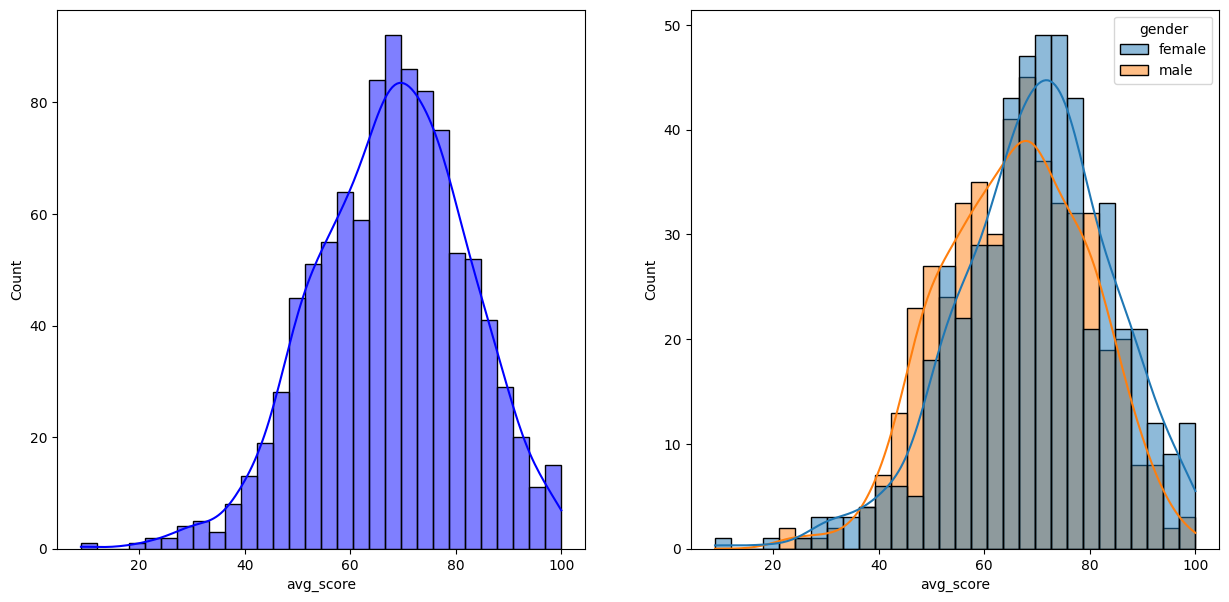

In [15]:
fig, ax = plt.subplots(1, 2, figsize=(15,7))
plt.subplot(121)
sns.histplot(data = data, x = 'avg_score', bins=30, kde=True, color='b')
plt.subplot(122)
sns.histplot(data = data, x = 'avg_score', bins=30, kde=True, hue='gender',
             color='b')

plt.show()

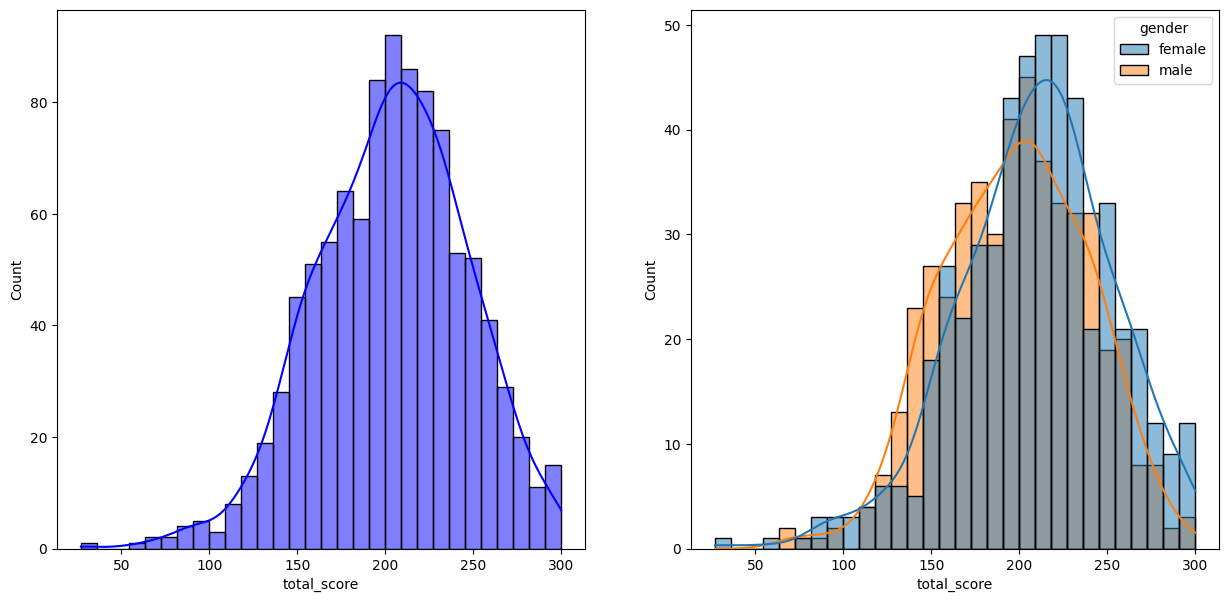

In [16]:
fig, ax = plt.subplots(1, 2, figsize=(15,7))
plt.subplot(121)
sns.histplot(data = data, x = 'total_score', bins=30, kde=True, color='b')
plt.subplot(122)
sns.histplot(data = data, x = 'total_score', bins=30, kde=True, hue='gender',
             color='b')

plt.show()

<Axes: xlabel='avg_score', ylabel='Count'>

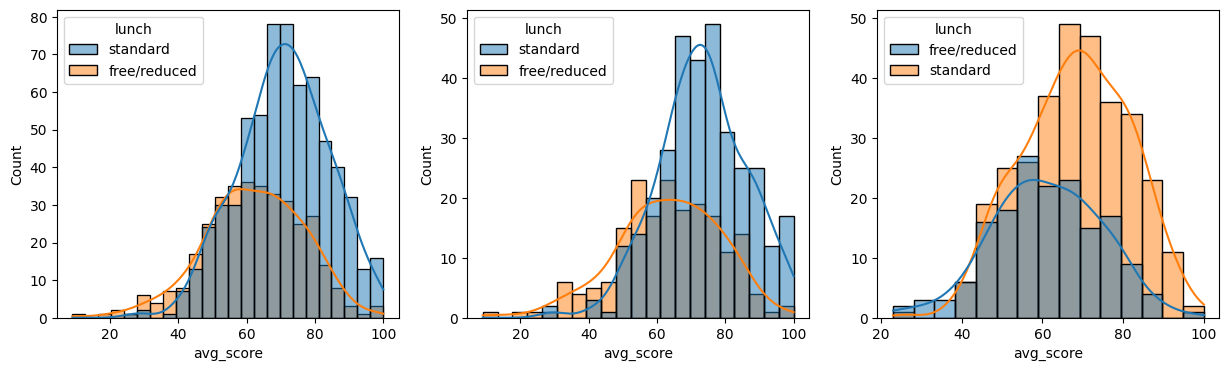

In [17]:
# based on lunch
plt.subplots(1,3,figsize=(15,4))
plt.subplot(131)
sns.histplot(data=data, x='avg_score', kde=True, hue='lunch')
plt.subplot(132)
sns.histplot(data=data[data.gender=='female'], x='avg_score', kde=True, hue='lunch')
plt.subplot(133)
sns.histplot(data=data[data.gender=='male'], x='avg_score', kde=True, hue='lunch')

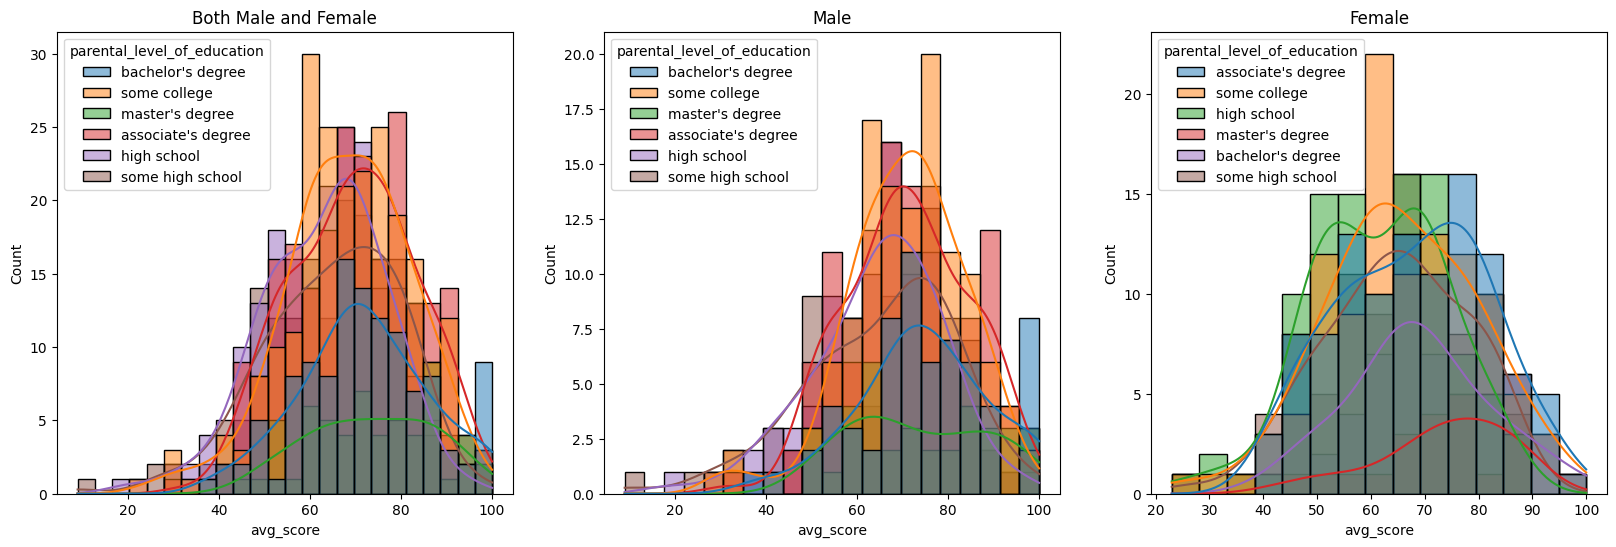

In [18]:
#based on parental_level_of_education
# # based on lunch
plt.subplots(1,3,figsize=(20,6))
plt.subplot(131)
plt.title('Both Male and Female')
sns.histplot(data=data, x='avg_score', kde=True, hue='parental_level_of_education')
plt.subplot(132)
plt.title('Male')
sns.histplot(data=data[data.gender=='female'], x='avg_score', kde=True, hue='parental_level_of_education')
plt.subplot(133)
plt.title('Female')
sns.histplot(data=data[data.gender=='male'], x='avg_score', kde=True, hue='parental_level_of_education')
plt.show()

In [19]:
cat_features

['gender',
 'race_ethnicity',
 'parental_level_of_education',
 'lunch',
 'test_preparation_course']

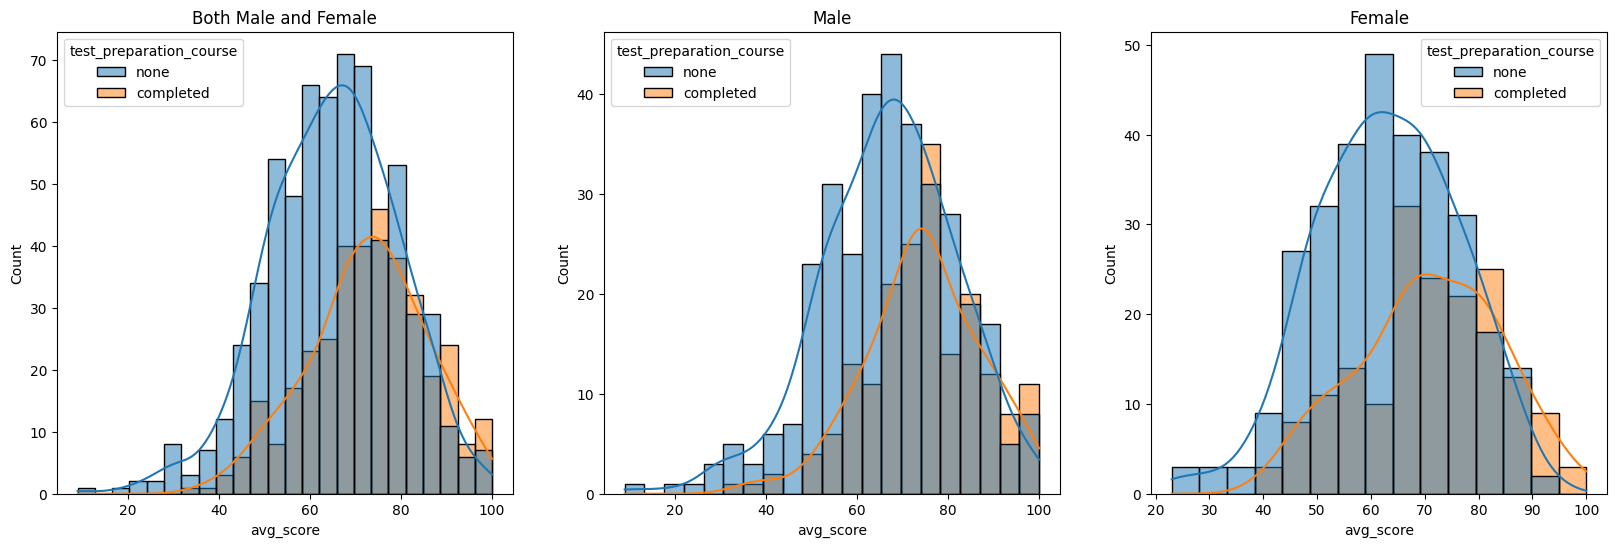

In [20]:
#based on parental_level_of_education
# # based on lunch
plt.subplots(1,3,figsize=(20,6))
plt.subplot(131)
plt.title('Both Male and Female')
sns.histplot(data=data, x='avg_score', kde=True, hue='test_preparation_course')
plt.subplot(132)
plt.title('Male')
sns.histplot(data=data[data.gender=='female'], x='avg_score', kde=True, hue='test_preparation_course')
plt.subplot(133)
plt.title('Female')
sns.histplot(data=data[data.gender=='male'], x='avg_score', kde=True, hue='test_preparation_course')
plt.show()

In [30]:
data.columns

Index(['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch',
       'test_preparation_course', 'math_score', 'reading_score',
       'writing_score', 'total_score', 'avg_score'],
      dtype='object')

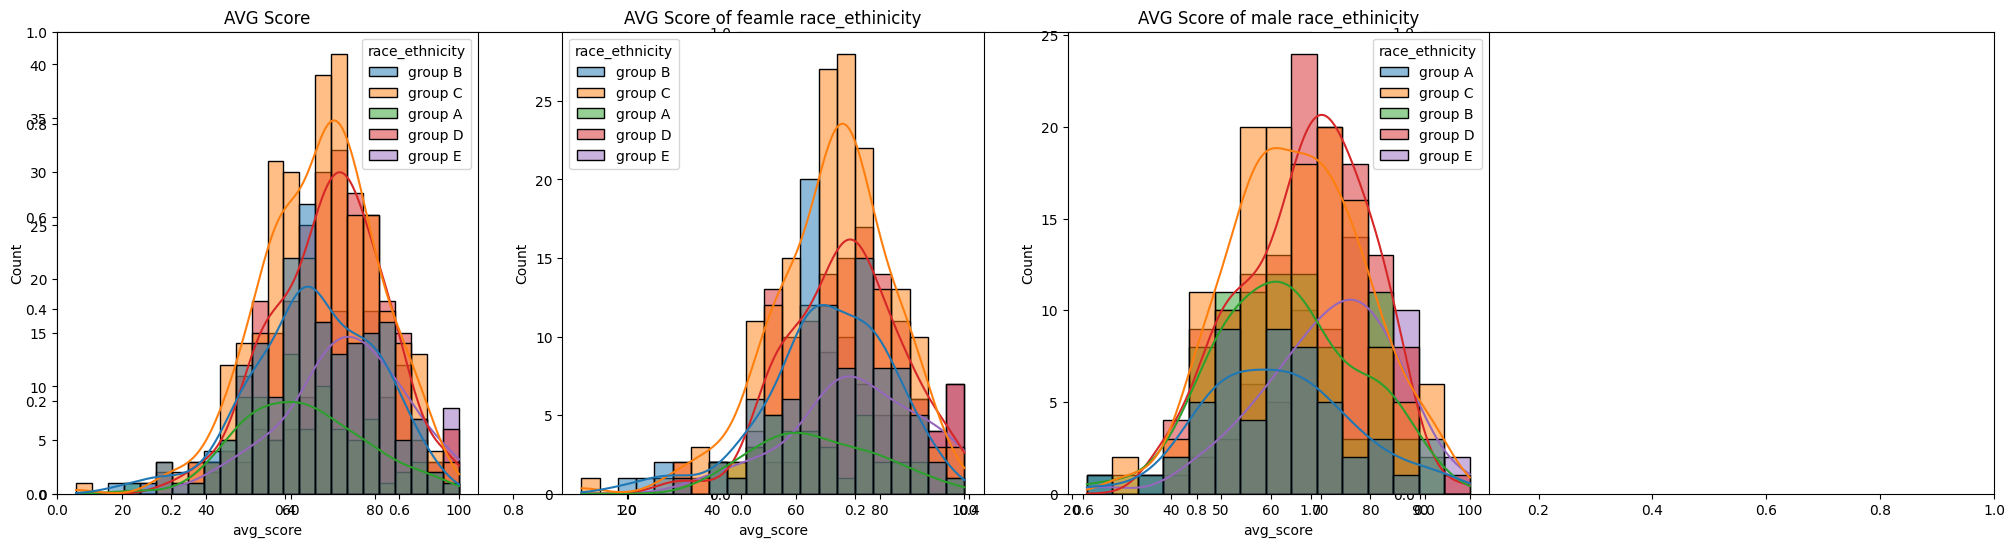

In [33]:
plt.subplots(1,3,figsize=(25,6))

plt.subplot(141)
plt.title("AVG Score")
ax =sns.histplot(data=data,x='avg_score',kde=True,hue='race_ethnicity')
plt.subplot(142)
plt.title("AVG Score of feamle race_ethinicity")
ax =sns.histplot(data=data[data.gender=='female'],x='avg_score',kde=True,hue='race_ethnicity')
plt.subplot(143)
plt.title("AVG Score of male race_ethinicity")
ax =sns.histplot(data=data[data.gender=='male'],x='avg_score',kde=True,hue='race_ethnicity')

plt.show()

<Axes: title={'center': 'Writing Score'}, ylabel='writing_score'>

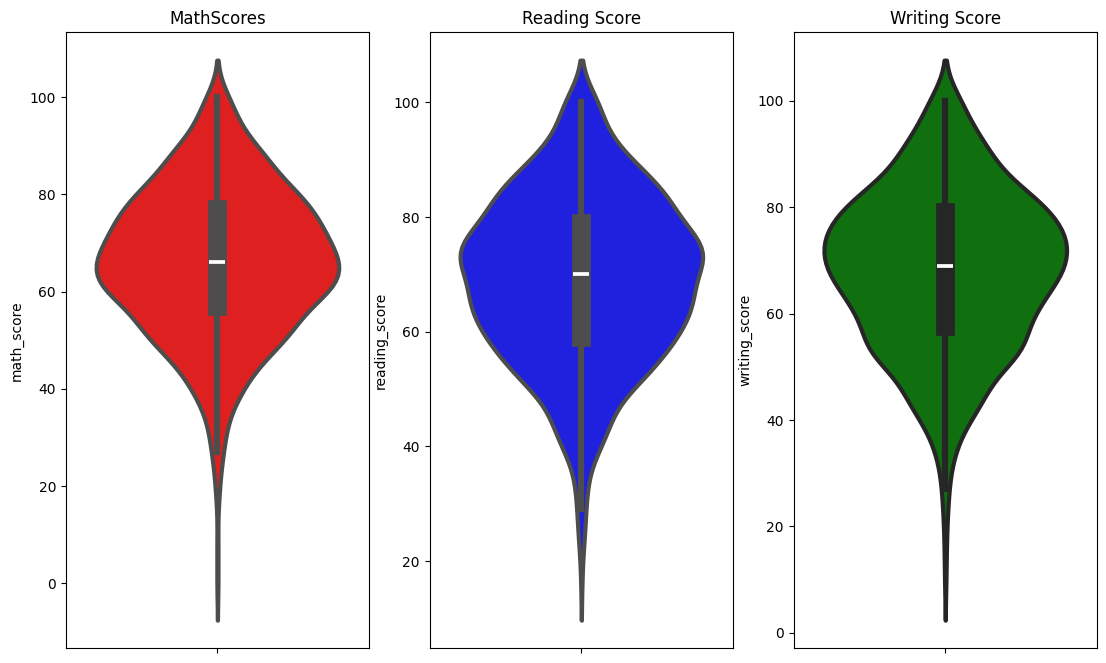

In [35]:
plt.figure(figsize=(18,8))
plt.subplot(1,4,1)
plt.title("MathScores")
sns.violinplot(y='math_score', data = data, color='red', linewidth=3)
plt.subplot(1,4,2)
plt.title("Reading Score")
sns.violinplot(y='reading_score', data = data, color='blue', linewidth=3)
plt.subplot(1,4,3)
plt.title("Writing Score")
sns.violinplot(y='writing_score', data = data, color='green', linewidth=3)

In [43]:
def pie_chart(label,color, size, title):
    plt.pie(size, colors = color, labels=label, autopct='%2f%%')
    plt.title(title, fontsize=20)
    plt.axis('off')

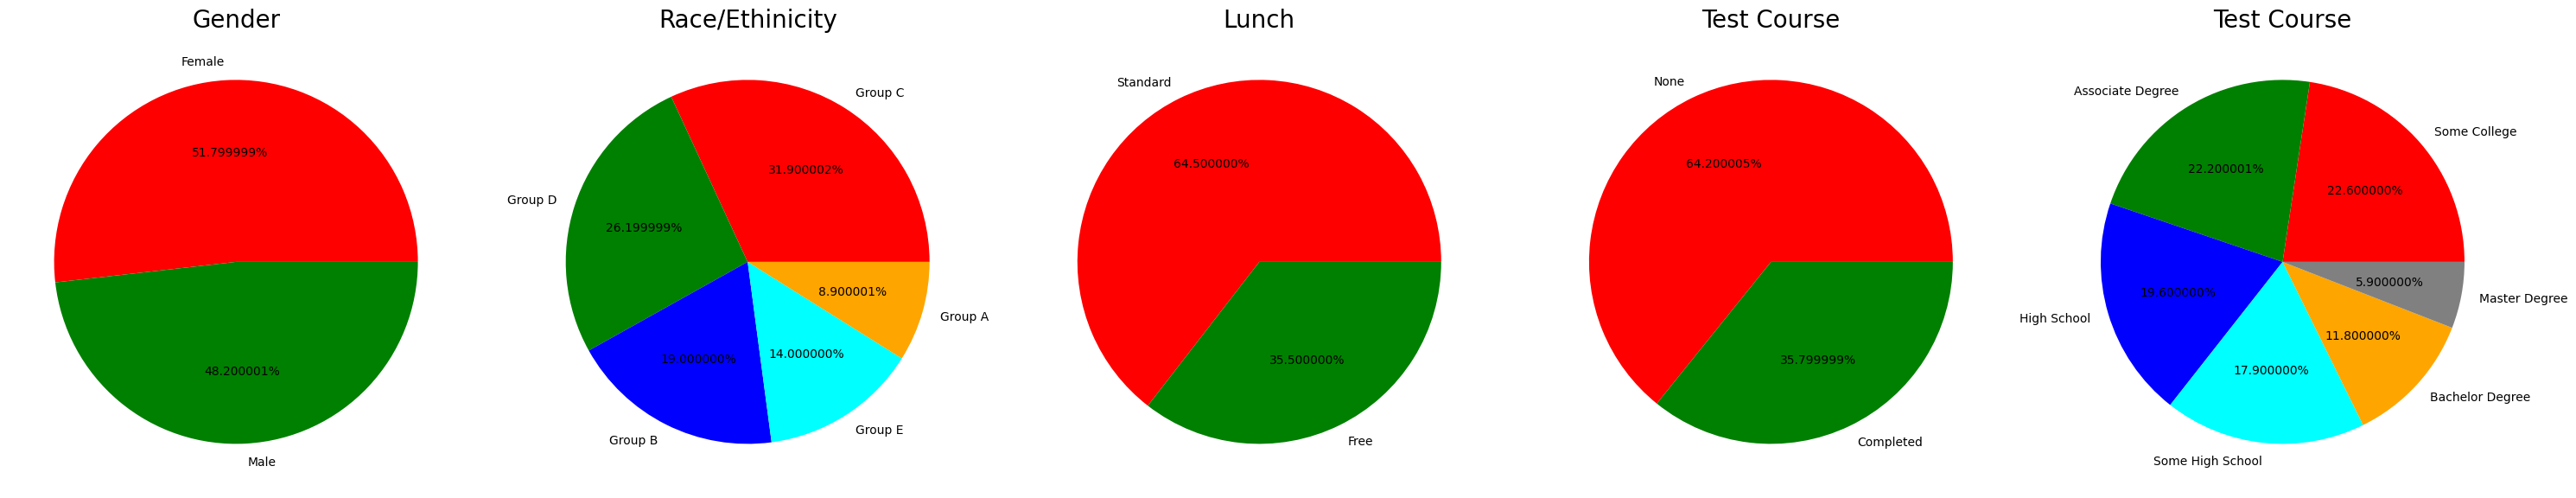

In [53]:
plt.rcParams['figure.figsize'] = (30, 12)

size = data['gender'].value_counts()
labels = 'Female','Male'
color = ['red','green']

plt.subplot(1,5,1)
pie_chart(labels, color, size, 'Gender')

plt.subplot(1,5,2)
size=data['race_ethnicity'].value_counts()
labels = 'Group C', 'Group D', 'Group B', 'Group E', 'Group A'
color = ['red', 'green','blue','cyan','orange']
pie_chart(labels, color, size, 'Race/Ethinicity')


plt.subplot(1,5,3)
size = data['lunch'].value_counts()
labels = 'Standard', 'Free'
color = ['red', 'green']
pie_chart(labels, color, size, 'Lunch')

plt.subplot(1,5,4)
size = data['test_preparation_course'].value_counts()
labels = 'None', 'Completed'
color = ['red', 'green']
pie_chart(labels, color, size, 'Test Course')

plt.subplot(1,5,5)
size = data['parental_level_of_education'].value_counts()
labels = 'Some College', 'Associate Degree','High School','Some High School','Bachelor Degree','Master Degree'
color = ['red', 'green', 'blue','cyan','orange','grey']
pie_chart(labels, color, size, 'Test Course')


plt.tight_layout()
plt.grid()
plt.show()


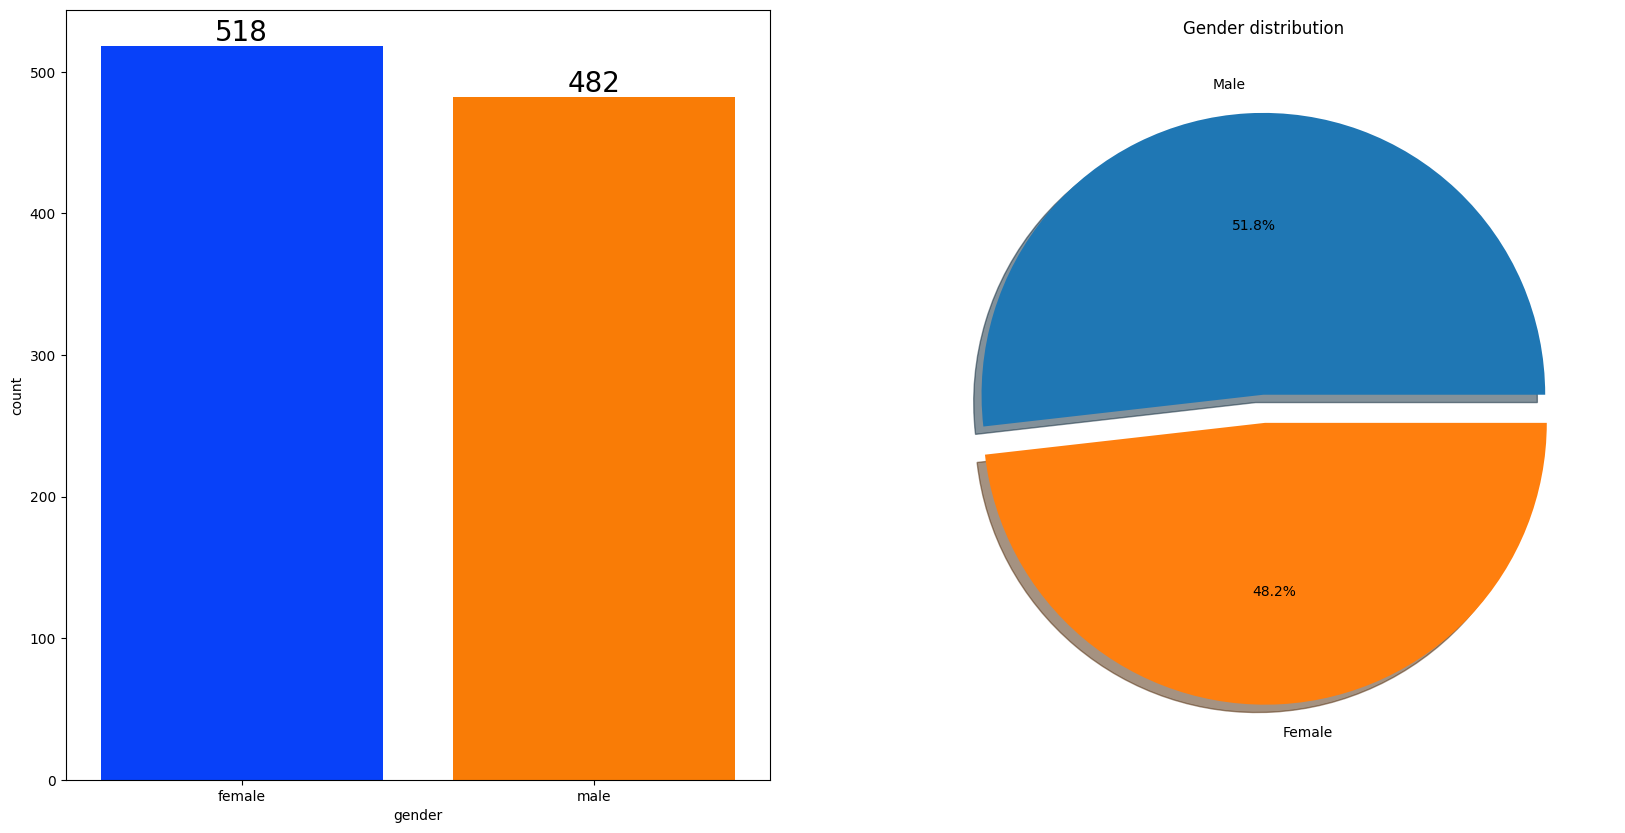

In [ ]:

f, ax = plt.subplots(1,2, figsize=(20,10))

sns.countplot(x = data['gender'], data = data, palette='bright',ax = ax[0], saturation=0.95)

for container in ax[0].containers:
    ax[0].bar_label(container, color = 'black',size =20)
    
plt.pie(x = data['gender'].value_counts(), labels = ['Male','Female'], explode=[0,0.1], autopct='%1.1f%%', 
        shadow=True)
plt.show()

In [70]:
data.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,avg_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [87]:
# Exclude non-numeric columns before applying mean
gender_group = data.groupby('gender').sum()
gender_group

,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,avg_score
gender,,,,,,,,,
female,group Bgroup Cgroup Bgroup Bgroup Bgroup Bgrou...,bachelor's degreesome collegemaster's degreeas...,standardstandardstandardstandardstandardfree/r...,nonecompletednonenonecompletednonenonenonenone...,32962,37611,37538,108111,36037.000000
male,group Agroup Cgroup Bgroup Dgroup Cgroup Dgrou...,associate's degreesome collegesome collegehigh...,free/reducedstandardfree/reducedfree/reducedst...,nonenonenonecompletednonenonecompletednonecomp...,33127,31558,30516,95201,31733.666667


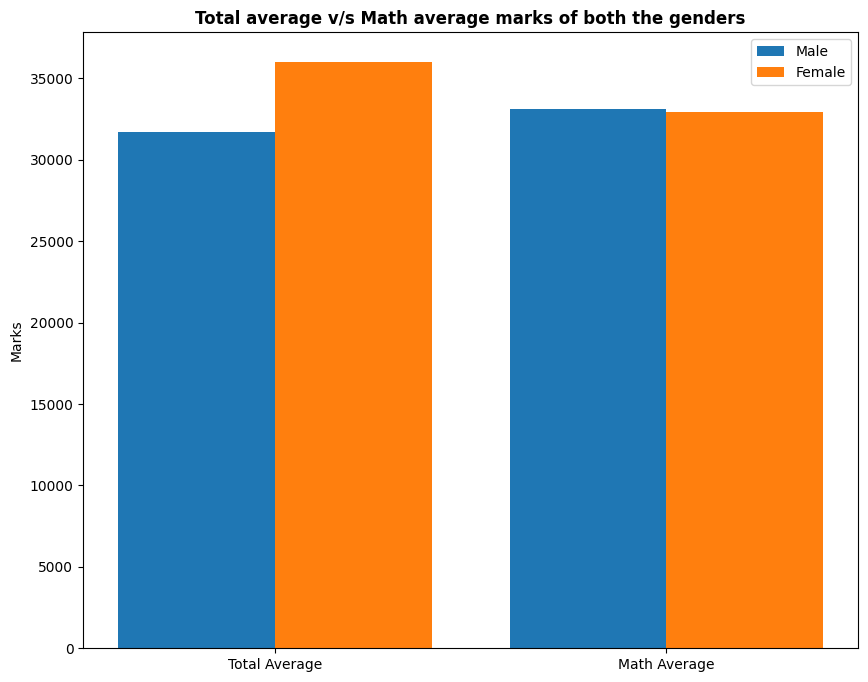

In [80]:
plt.figure(figsize=(10, 8))

X = ['Total Average','Math Average']


female_scores = [gender_group['avg_score'][0], gender_group['math_score'][0]]
male_scores = [gender_group['avg_score'][1], gender_group['math_score'][1]]

X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, male_scores, 0.4, label = 'Male')
plt.bar(X_axis + 0.2, female_scores, 0.4, label = 'Female')
  
plt.xticks(X_axis, X)
plt.ylabel("Marks")
plt.title("Total average v/s Math average marks of both the genders", fontweight='bold')
plt.legend()
plt.show()

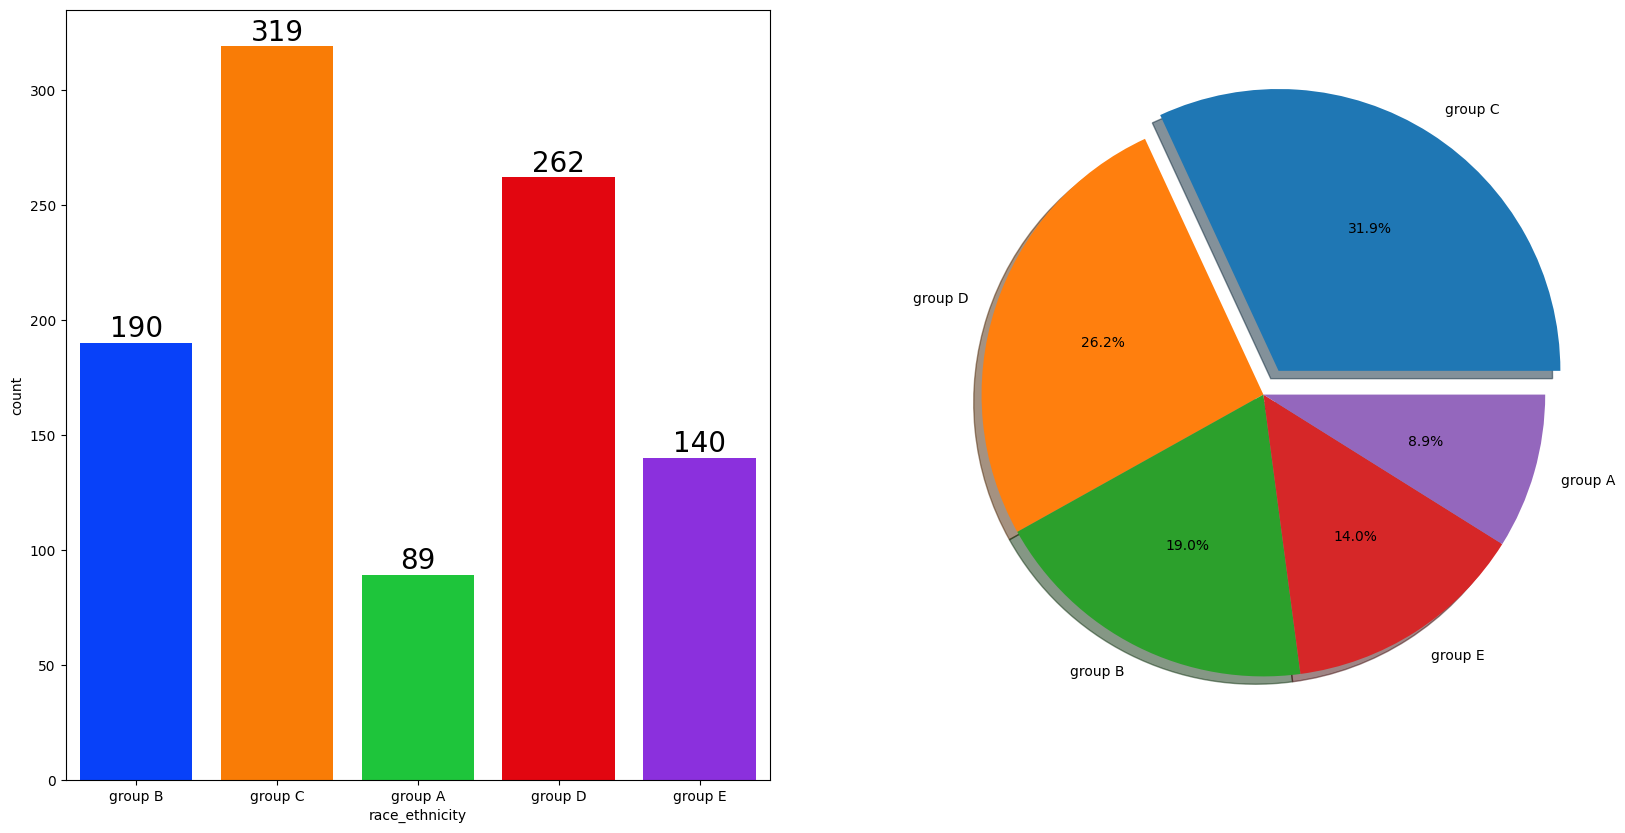

In [89]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=data['race_ethnicity'],data=data,palette = 'bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x = data['race_ethnicity'].value_counts(),labels=data['race_ethnicity'].value_counts().index,explode=[0.1,0,0,0,0],autopct='%1.1f%%',shadow=True)
plt.show()   

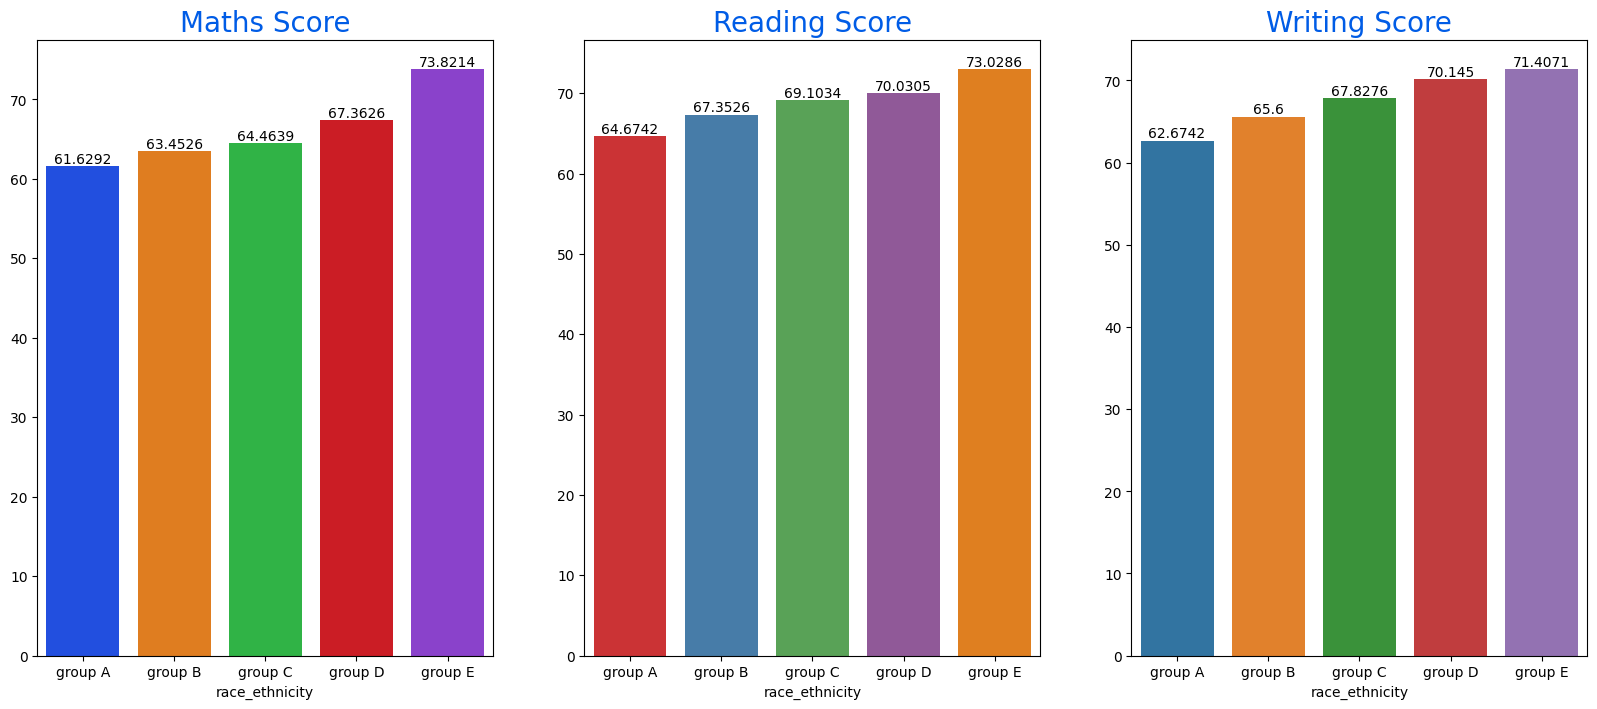

In [131]:
groupEthinicity = data.groupby('race_ethnicity')

f,ax = plt.subplots(1,3, figsize=(20,8))
sns.barplot(x=groupEthinicity['math_score'].mean().index, y=groupEthinicity['math_score'].mean().values, palette='bright', ax = ax[0])
ax[0].set_title('Maths Score', color='#005ce6', size=20)

#to give the label on each bar
for container in ax[0].containers:
    ax[0].bar_label(container, color='black', size=10)

sns.barplot(x=groupEthinicity['reading_score'].mean().index,
            y = groupEthinicity['reading_score'].mean().values, 
            palette = 'Set1', 
            ax=ax[1])
ax[1].set_title('Reading Score', color='#005ce6', size=20)

for container in ax[1].containers:
    ax[1].bar_label(container, color = 'black', size=10)
    
#writing_score
sns.barplot(x=groupEthinicity['writing_score'].mean().index,
            y = groupEthinicity['writing_score'].mean().values, 
            palette = 'tab10', 
            ax=ax[2])
ax[2].set_title('Writing Score', color='#005ce6', size=20)

for container in ax[2].containers:
    ax[2].bar_label(container, color = 'black', size=10)

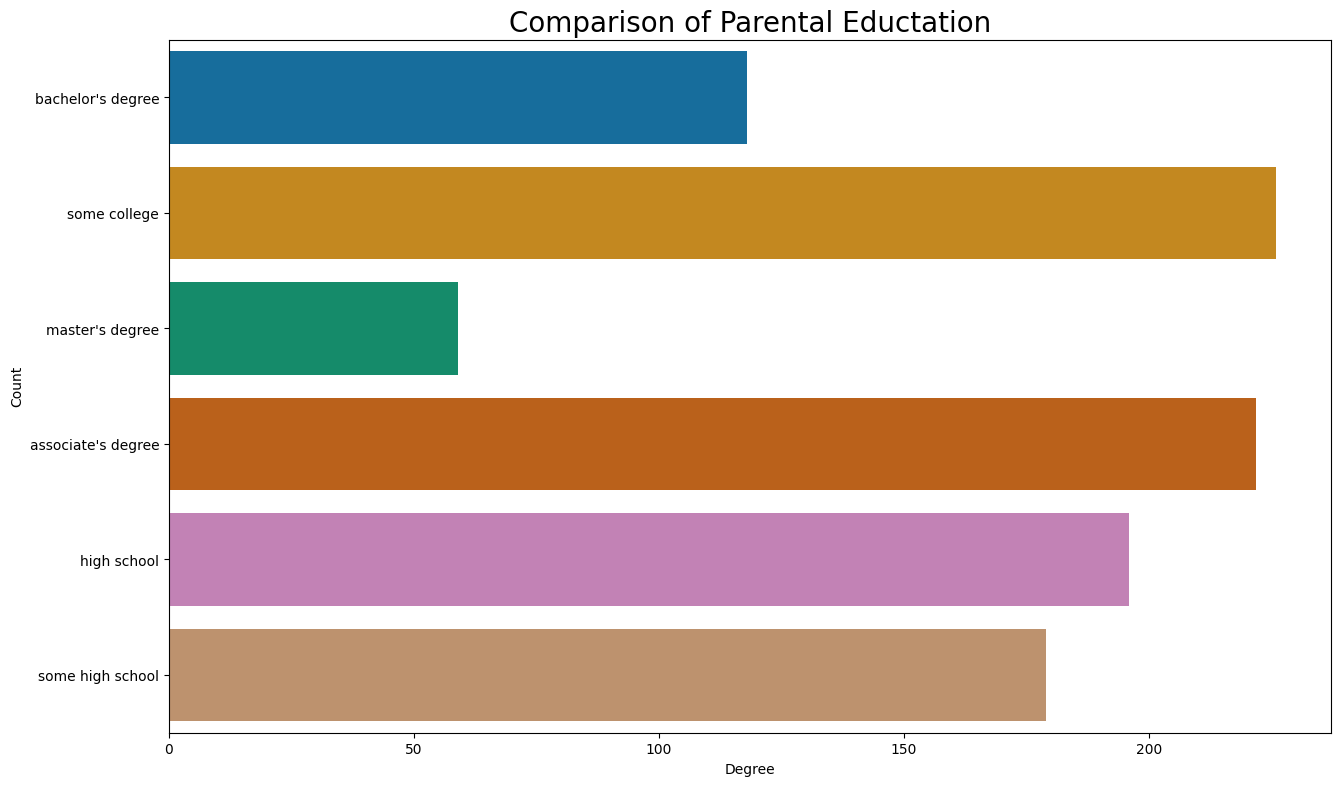

In [142]:
plt.rcParams['figure.figsize']=(15,9)
sns.countplot(data['parental_level_of_education'], palette='colorblind')
plt.title('Comparison of Parental Eductation', fontweight=30, fontsize=20)
plt.xlabel("Degree")
plt.ylabel('Count')
plt.show()

In [146]:
num_features

['math_score', 'reading_score', 'writing_score']

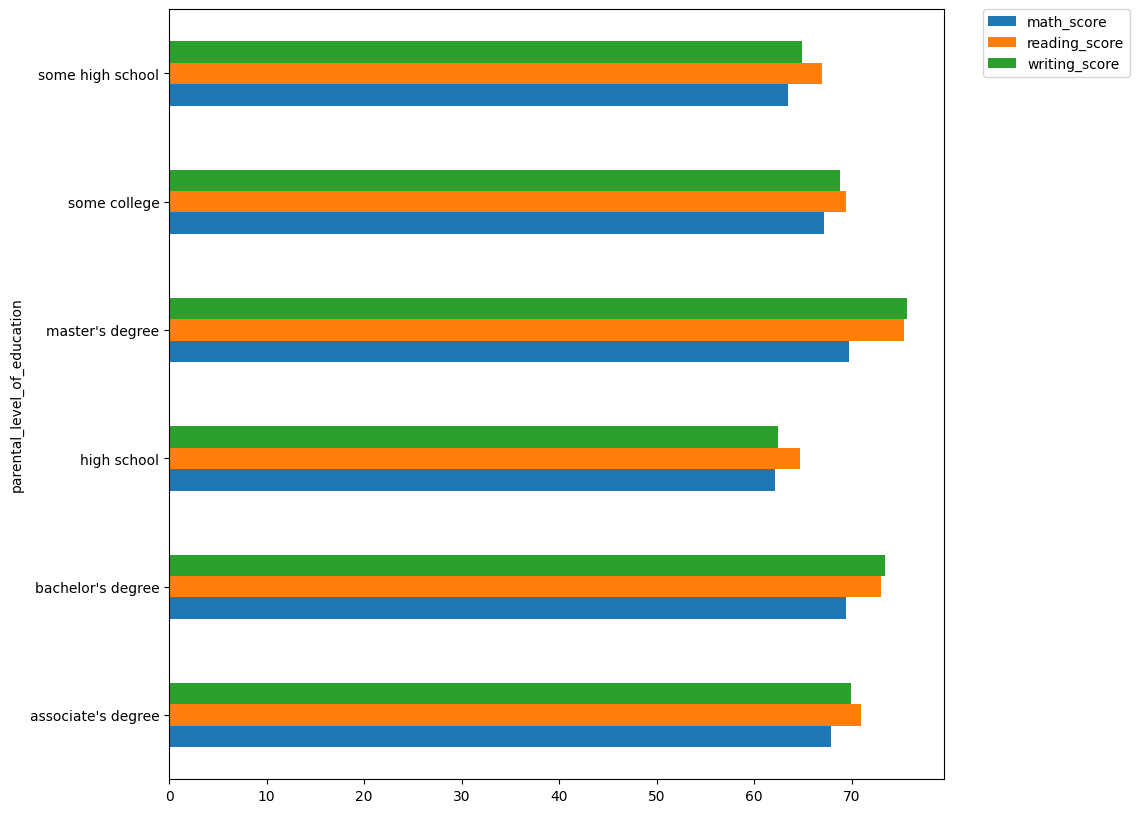

In [158]:
# Group by using parents' education and exclude non-numeric columns before applying mean
data.groupby('parental_level_of_education')[num_features].mean().plot(kind='barh', figsize=(10,10), color=sns.color_palette("tab10"))
plt.legend(bbox_to_anchor=(1.05,1), loc=2, borderaxespad=0.)
plt.show()

In [162]:
data.columns

Index(['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch',
       'test_preparation_course', 'math_score', 'reading_score',
       'writing_score', 'total_score', 'avg_score'],
      dtype='object')

### LUNCH

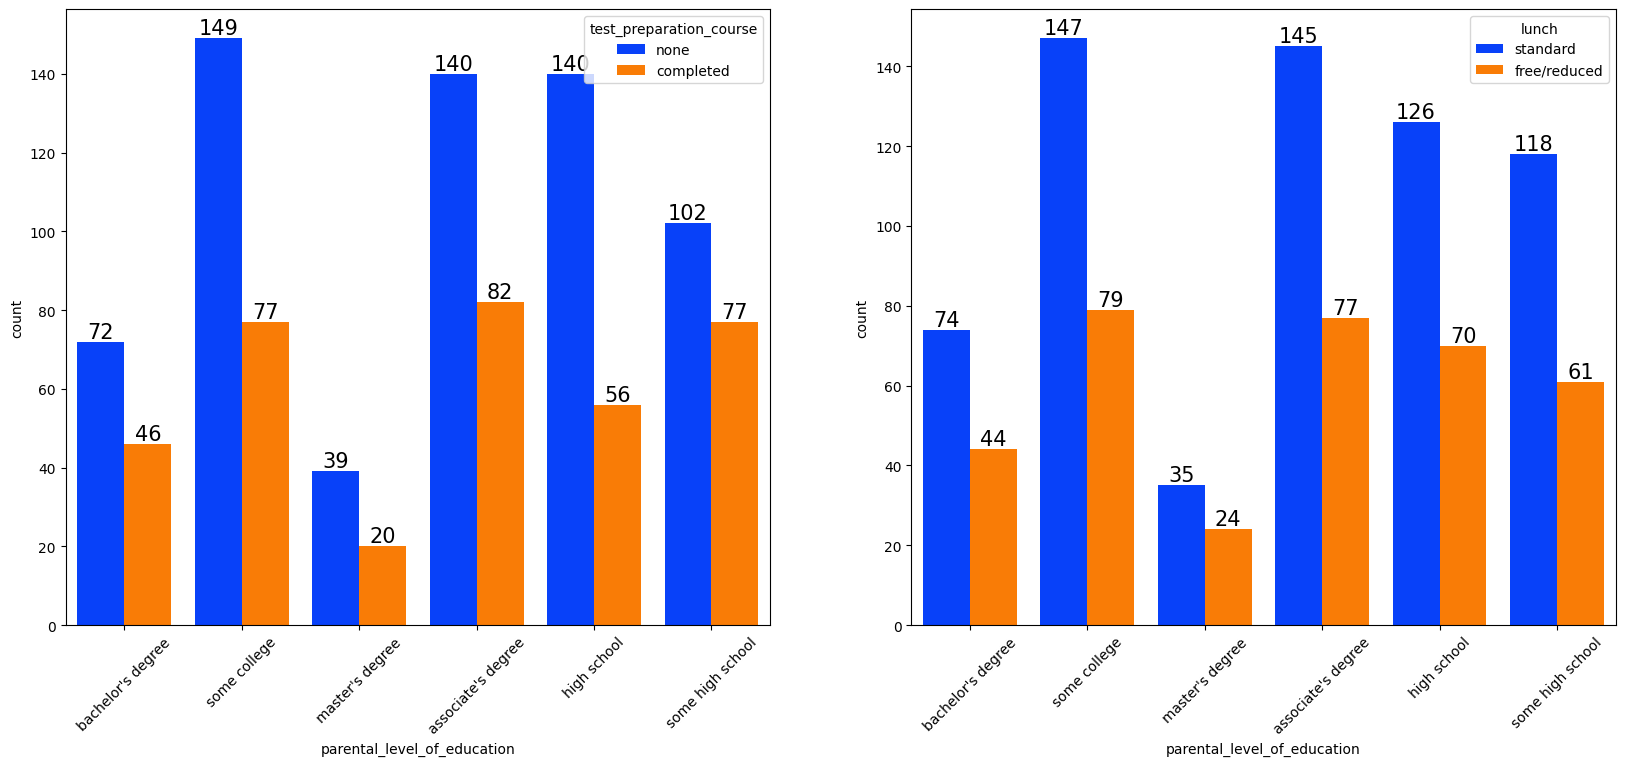

In [174]:
#bivariate
f,ax=plt.subplots(1,2,figsize=(20,8))

sns.countplot(x=data['parental_level_of_education'], data=data, palette='bright', hue='test_preparation_course', saturation=0.95, ax=ax[0])
for container in ax[0].containers:
    ax[0].bar_label(container, color='black', size=15)
ax[0].tick_params(axis='x', rotation=45)
sns.countplot(x=data['parental_level_of_education'], data=data, palette='bright', hue='lunch', saturation=0.95, ax=ax[1])
for container in ax[1].containers:
    ax[1].bar_label(container, color='black', size=15)
       
ax[1].tick_params(axis='x', rotation=45)   
    

<Axes: xlabel='lunch', ylabel='writing_score'>

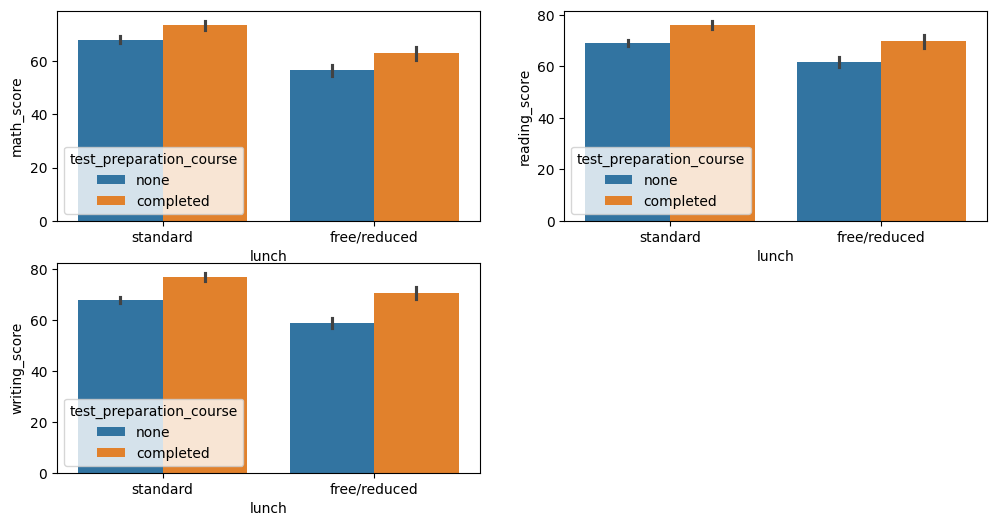

In [183]:
#1. Which type of lunch is common
#2. is test preparation course has any impact
plt.figure(figsize=(12,6))
plt.subplot(2,2,1)
sns.barplot(x=data['lunch'],y=data['math_score'], hue=data['test_preparation_course'])

plt.subplot(2,2,2)
sns.barplot(x=data['lunch'],
            y=data['reading_score'],
            hue=data['test_preparation_course'])

plt.subplot(2,2,3)
sns.barplot(x=data['lunch'],
            y=data['writing_score'],
            hue=data['test_preparation_course'])



`Student who have completed Test course have scores higher in all three `

### Outliers

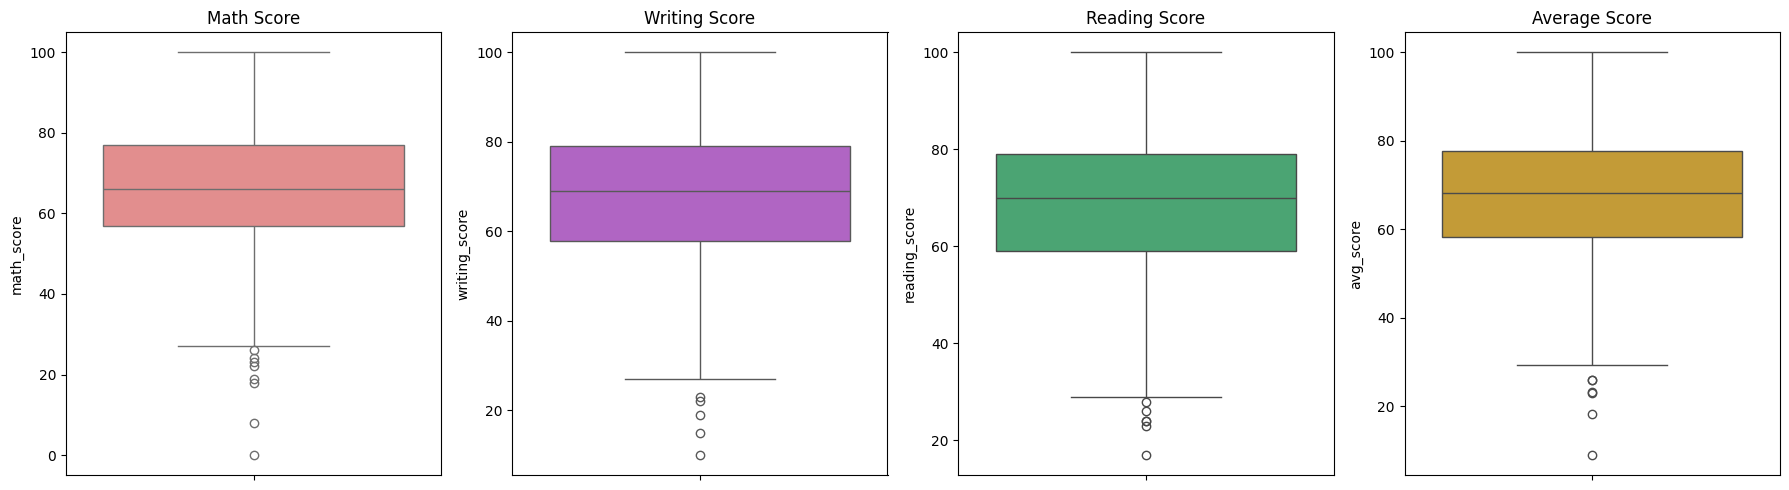

In [191]:
plt.subplots(1, 4, figsize=(18, 5))

plt.subplot(1, 4, 1)
sns.boxplot(data['math_score'], color='lightcoral')
plt.title("Math Score")

plt.subplot(1, 4, 2)
sns.boxplot(data['writing_score'], color='mediumorchid')
plt.title("Writing Score")

plt.subplot(1, 4, 3)
sns.boxplot(data['reading_score'], color='mediumseagreen')
plt.title("Reading Score")

plt.subplot(1, 4, 4)
sns.boxplot(data['avg_score'], color='goldenrod')
plt.title("Average Score")

plt.tight_layout()
plt.show()


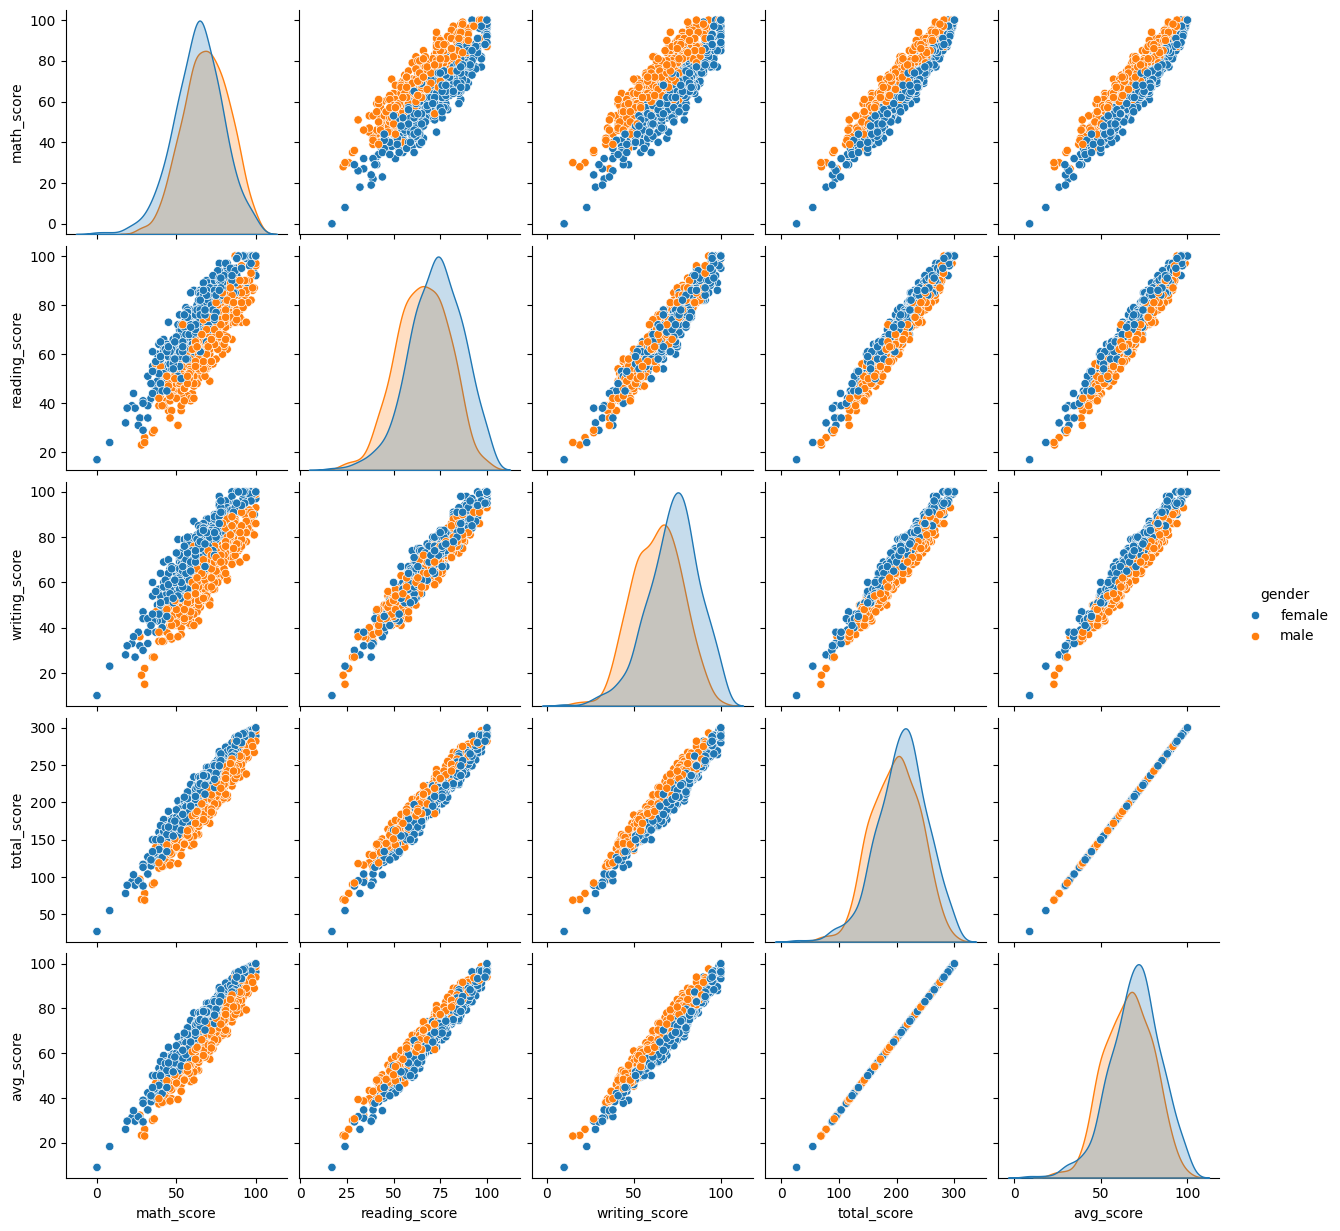

In [193]:
sns.pairplot(data, hue='gender')
plt.show()

### Insights
`all the scores are linearly with each other`